In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'C:\Users\wsaha\Documents\Hotel set'

In [8]:
#Import hotel data set with Latin -1 encoding

dfhotel = pd.read_csv(os.path.join(path, 'Data set', 'Prepared', 'Df_hotel_cleaned.csv'), encoding='latin-1')

In [5]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [9]:
dfhotel.head()

,Unnamed: 0,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Destination Country,...,No_of_rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Price per day_Singapore_$,Discount,Profit Margin,Price of Room per Day,Total Price
0,0,DDMY00001,01/01/2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Denmark,...,1,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,1%,0.25,243.000000,1944.0
1,1,DDID00002,01/01/2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,Colombia,...,2,Enchanted Isle,4.2,Wallet,EZ-Link,312,0%,0.24,156.000000,156.0
2,2,DDSG00003,01/01/2010,11:52:56,SG00001,Female,31,Singapore,Central,Germany,...,2,Seacoast Hotel,4.5,Credit Card,Grab,338,19%,0.20,169.000000,1183.0
3,3,DDSG00004,01/01/2010,13:44:40,SG00002,Male,28,Singapore,North,Canada,...,2,Night In Paradise,4.2,Debit Card,DBS Paylah,254,19%,0.13,127.000000,508.0
4,4,DDKH00005,01/01/2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Kenya,...,3,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,15%,0.17,104.333333,313.0


# <span style="font-size:16px; color:black;">Since the cleaning has been done in previous steps it is not shown here.</span>

#  <span style="font-size:16px; color:black;">Hypothesis 1.</span>

#    <span style="font-size:16px; color:black;">"It is possible to position room per night at a higher price when customer ratings are high but it resulted in low profit margin".</span>

- <span style="font-size:16px; color:black;">Dependant variable : Price</span>
- <span style="font-size:16px; color:black;">independant variable : Rating</span>
     

In [20]:
dfhotel['Price of Room per Day'].describe()

count    66536.000000
mean       120.016938
std         92.845079
min          8.750000
25%         53.666667
50%         92.666667
75%        156.000000
max        575.000000
Name: Price of Room per Day, dtype: float64

In [23]:
dfhotel['Hotel Rating'].describe()

count    66536.000000
mean         4.288508
std          0.275518
min          3.300000
25%          4.200000
50%          4.300000
75%          4.500000
max          4.700000
Name: Hotel Rating, dtype: float64

In [21]:
dfhotel['Price of Room per Day'].median() # Check the median

92.66666666666669

C:\Users\wsaha\AppData\Local\Temp\ipykernel_19800\3428645259.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfhotel['Price of Room per Day'], bins=25) # Shows extreme values
C:\Users\wsaha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


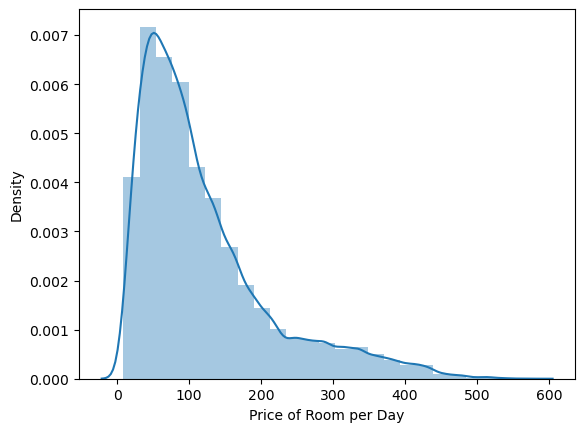

In [43]:
sns.distplot(dfhotel['Price of Room per Day'], bins=25) # Shows extreme values

plt.savefig('histo price room density.png')

C:\Users\wsaha\AppData\Local\Temp\ipykernel_19800\1460152400.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfhotel['Hotel Rating'], bins=25) # Shows extreme values
C:\Users\wsaha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


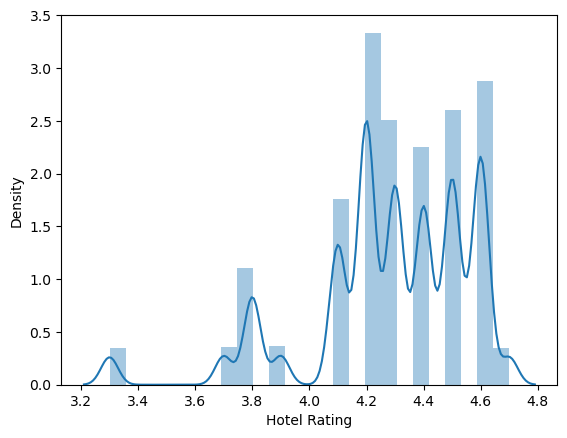

In [44]:
sns.distplot(dfhotel['Hotel Rating'], bins=25) # Shows extreme values

plt.savefig('rating density.png')

# <span style="font-size:16px; color:black;">Both data set has no significant outliers/extream values.</span>


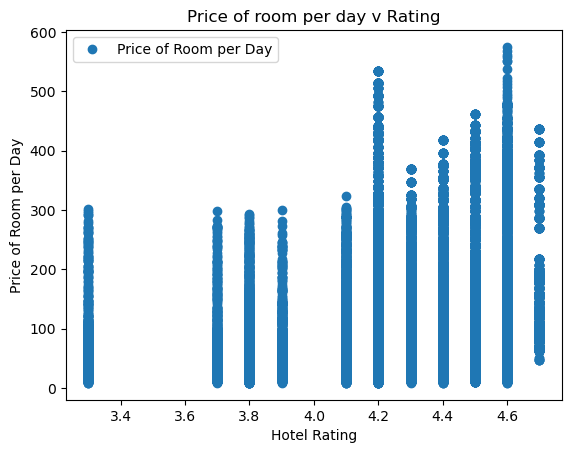

<Figure size 640x480 with 0 Axes>

In [45]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

dfhotel.plot(x = 'Hotel Rating', y='Price of Room per Day',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price of room per day v Rating')  
plt.xlabel('Hotel Rating')  
plt.ylabel('Price of Room per Day')  
plt.show()

plt.savefig('Price of room per day v Rating.png')

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = dfhotel['Hotel Rating'].values.reshape(-1,1)
y = dfhotel['Price of Room per Day'].values.reshape(-1,1)

In [25]:
X

array([[4.3],
       [4.2],
       [4.5],
       ...,
       [4.4],
       [4.2],
       [4.3]])

In [26]:
y

array([[243.        ],
       [156.        ],
       [169.        ],
       ...,
       [ 79.5       ],
       [ 86.5       ],
       [ 60.66666667]])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [29]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

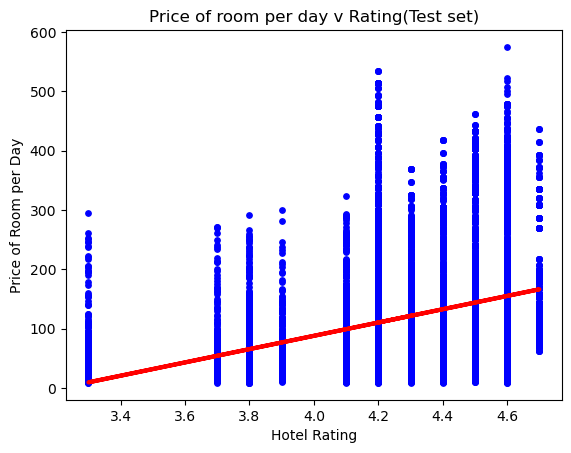

<Figure size 640x480 with 0 Axes>

In [46]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price of room per day v Rating(Test set)')
plot_test.xlabel('Hotel Rating')
plot_test.ylabel('Price of Room per Day')
plot_test.show()

plt.savefig('Price of room per day v Rating(Test set) regression line.png')

In [32]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [33]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[112.02678699]]
Mean squared error:  7589.486329662423
R2 score:  0.11079206912955397


<span style="font-size:16px; color:blue;">Slope indicates that there is a positive relationship between two variables. However large rmse and  r score of 0.11 indicates that the model is a poor fit .</span>

In [34]:
y_predicted

array([[121.74726492],
       [110.54458622],
       [ 65.73387142],
       ...,
       [ 99.34190752],
       [166.55797972],
       [110.54458622]])

In [35]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,307.000000,121.747265
1,80.000000,110.544586
2,65.000000,65.733871
3,36.500000,110.544586
4,68.000000,110.544586
5,144.000000,144.152622
6,74.000000,144.152622
7,133.500000,110.544586
8,144.500000,121.747265
9,106.000000,132.949944


<span style="font-size:16px; color:blue;">in many cases there is a big difference between predictive and actual values this indicates that the model is not an optimal way to see if ratings has an impact on hotel room price per day.</span>


In [36]:
##Compare how the regression fits the training set

# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [37]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[112.02678699]]
Mean squared error:  7701.846124890029
R2 score:  0.11024160371377234


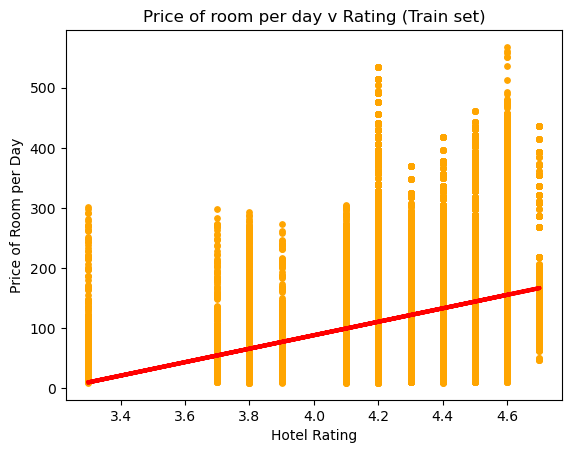

<Figure size 640x480 with 0 Axes>

In [47]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='orange', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price of room per day v Rating (Train set)')
plot_test.xlabel('Hotel Rating')
plot_test.ylabel('Price of Room per Day')
plot_test.show()

plt.savefig('Price of room per day v Rating(training set) regression line.png')

<span style="font-size:16px; color:blue;">It indicates that training and tests sets results are same so the model 
respond well for unseen data, even the model seems a poor fit for variables</span>


In [41]:
dfhotel.to_csv(os.path.join(path, 'Data set', 'Prepared', 'Df_hotel_cleaned.csv'))